In [1]:
#Import libraries
import pandas as pd
import nltk
import tweepy
nltk.download('punkt')
nltk.download('wordnet')
from nltk import sent_tokenize, word_tokenize
from nltk.stem.snowball import SnowballStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
import re
import spacy
nlp = spacy.load('en_core_web_lg')
import seaborn as sns
import datetime as dt
import warnings
warnings.filterwarnings('ignore')
from textblob import TextBlob
import os
import time
os.chdir('F:/Use Cases ML/SMA')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Toshiba\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Toshiba\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
#Importing twitter API credentials
%run ./keys_tweeter.ipynb

In [3]:
auth = tweepy.OAuthHandler(consumer_key,consumer_secret)
auth.set_access_token(access_token,access_token_secret)
api = tweepy.API(auth,wait_on_rate_limit=True)

In [4]:
search_terms = 'spinal muscular atrophy '
lang = 'english'
date_since = "2021-05-01"
tweets = []
likes = []
time = []
#cursor = tweepy.Cursor(api.search,q=search_terms,tweet_mode = "extended",since='2021-01-01', until='2021-05-10').items()
for i in tweepy.Cursor(api.search,q=search_terms,lang="en",tweet_mode = "extended",\
                       since_id=date_since,count=200).items():
    tweets.append(i.full_text)
    likes.append(i.favorite_count)
    time.append(i.created_at)

In [5]:
df = pd.DataFrame({'tweets':tweets,'likes':likes,'time':time})

In [6]:
#Removing retweets
df = df[~df.tweets.str.contains("RT")]
df=df.reset_index(drop=True)

In [7]:
df.to_csv('Tweets.csv',index=True)

In [8]:
mostlike = df.loc[df.likes.nlargest(10).index]

In [9]:
mostlike

,tweets,likes,time
75,What an adorable man!! #AkınAkınözü donated th...,395,2021-05-21 19:53:46
95,I love it when I share the good news. Ukrainia...,68,2021-05-21 11:47:07
36,@Runjhunsharmas \nPls share about #ayaansh @...,32,2021-05-22 14:48:22
226,"@AnupamPKher @AnupamPKher Sir, Plz extend a li...",28,2021-05-19 04:26:03
181,"Zolgensma, a form of gene therapy for babies a...",26,2021-05-19 17:05:41
94,"#SaveAyaanshGupta, he has been suffering from ...",22,2021-05-21 13:13:54
101,"@raimasen,mam @FightsSma is a 3 years old kid ...",21,2021-05-21 07:04:42
35,"translation thread:\n\n""From a young age, I ha...",17,2021-05-22 14:57:06
302,"Dear @netshrink , @FightsSma is a 2 years and ...",17,2021-05-17 20:00:52
78,@mindykaling @mindykaling please extend ur lil...,15,2021-05-21 19:06:55


In [10]:
list_of_sentences = [sentence for sentence in df.tweets]
lines = []
for sentence in list_of_sentences:
    words = sentence.split()
    for w in words:
        lines.append(w)

In [11]:
#Removing Punctuation
lines = [re.sub(r'[^A-Za-z0-9]+', '', x) for x in lines]
lines2 = []
for word in lines:
    if word != '':
        lines2.append(word)

In [12]:
#This is stemming the words to their root
from nltk.stem.snowball import SnowballStemmer

# The Snowball Stemmer requires that you pass a language parameter
s_stemmer = SnowballStemmer(language='english')

stem = []
for word in lines2:
    stem.append(s_stemmer.stem(word))

In [13]:
#Removing all Stop Words
stem2 = []
nlp.Defaults.stop_words |= {"muscular","spinal","atrophi","plz","eidmubarak","httpstcogffidzouvt",
                            "extend","3yr","ayaansh","veri","need","60","cant","hold","help",
                            "httpstco2fbyisqr85","saveayaanshgupta","atrophyh","old","httpstcot0bldsdqgk",
                            "fightssma3yr","evn","lil","littl","fightssma","come","sir",
                            "Ayaansh","AYUSH","anoth","pleas","condit","httpstcosik3d8xot1","month",
                            "year","2","11","1","3"}
for word in stem:
    if word not in nlp.Defaults.stop_words:
        stem2.append(word)

In [14]:
df1 = pd.DataFrame(stem2)
df1 = df1[0].value_counts()

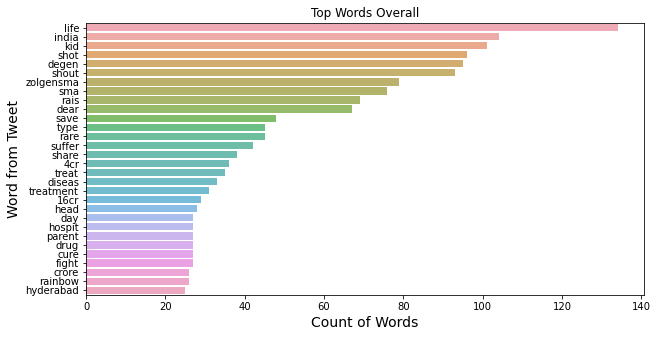

In [15]:
df1 = df1[:30,]
plt.figure(figsize=(10,5))
sns.barplot(df1.values, df1.index, alpha=0.8)
plt.title('Top Words Overall')
plt.ylabel('Word from Tweet', fontsize=14)
plt.xlabel('Count of Words', fontsize=14)
plt.show()

In [16]:
def show_ents(doc):
    if doc.ents:
        for ent in doc.ents:
            print(ent.text + ' - ' + ent.label_ + ' - ' + str(spacy.explain(ent.label_)))

In [17]:
str1 = " " 
stem2 = str1.join(lines2)
stem2 = nlp(stem2)
label = [(X.text, X.label_) for X in stem2.ents]
df6 = pd.DataFrame(label, columns = ['Word','Entity'])
df7 = df6.where(df6['Entity'] == 'ORG')
df7 = df7['Word'].value_counts()

In [18]:
#df7

In [19]:
#df7.drop(["Ayaansh FightsSma 3yr old"],axis=0,inplace=True)

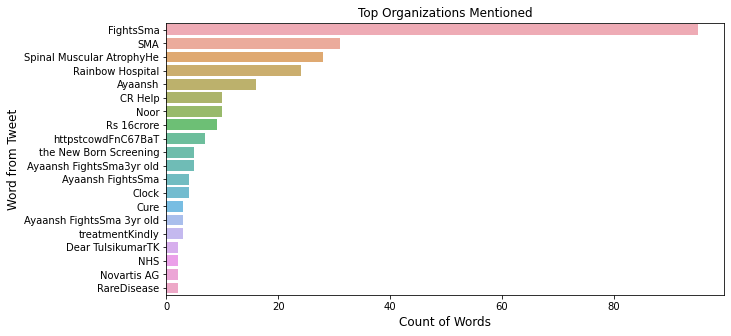

In [18]:
df = df7[:20,]
plt.figure(figsize=(10,5))
sns.barplot(df.values, df.index, alpha=0.8)
plt.title('Top Organizations Mentioned')
plt.ylabel('Word from Tweet', fontsize=12)
plt.xlabel('Count of Words', fontsize=12)
plt.show()

In [19]:
str1 = " " 
stem2 = str1.join(lines2)

stem2 = nlp(stem2)

label = [(X.text, X.label_) for X in stem2.ents]

df10 = pd.DataFrame(label, columns = ['Word','Entity'])

df10 = df10.where(df10['Entity'] == 'PERSON')

df11 = df10['Word'].value_counts()

In [22]:
#df11.drop(["Plz","Ayaansh","Little Ayaansh Gupta","Baby Ayaansh Gupta"],axis=0,inplace=True)
#df11.drop(["Zolgensma"],axis=0,inplace=True)

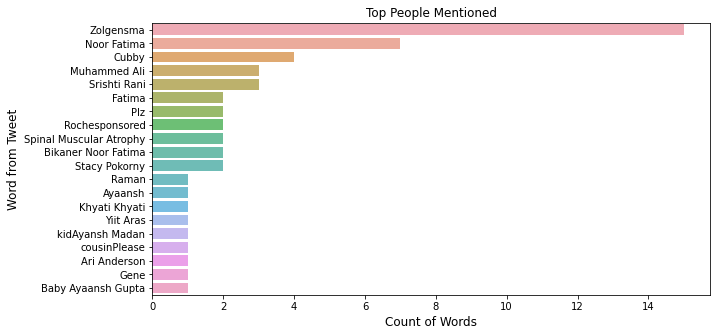

In [20]:
df = df11[:20,]
plt.figure(figsize=(10,5))
sns.barplot(df.values, df.index, alpha=0.8)
plt.title('Top People Mentioned')
plt.ylabel('Word from Tweet', fontsize=12)
plt.xlabel('Count of Words', fontsize=12)
plt.show()